## Fashion MNIST problemset
Here, we will build and train a network to classify articles of clothing from the MNIST dataset

In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
import helper


# define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# download and load training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# download and load test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

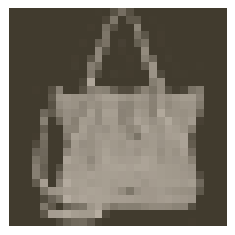

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

### Building the network
- define network architecture
- each image is 28 x 28 (=784 pixels)
- 10 classes
- '>= 1 hidden layer
- ReLU activations for the layers
- return the log-softmax from forward pass

In [3]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

### Create the network
- define the criterion and the optimizer

In [4]:
# loss function
criterion = nn.NLLLoss()

In [5]:
from torch import optim

optimizer = optim.SGD(model.parameters(), lr=0.005)

### Train the network
- make a forward pass through the network to get the logits
- use the logits to calculate loss
- perform a backward pass through the network with loss.backward() to calculate the gradients
- take a step with the optimizer to update weights

In [6]:
# prepare images for iteration
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # flatten images into 784 vector
        images = images.view(images.shape[0], -1)
        
        # clear gradients between training passes
        optimizer.zero_grad()
        
        # forward pass
        output = model(images)
        # calculate loss
        loss = criterion(output, labels)
        # backward pass
        loss.backward()
        # optimizer step, update weight
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8053973571959334
Training loss: 0.8201193832385261
Training loss: 0.6328926829895231
Training loss: 0.5659834077553962
Training loss: 0.5228577483532779


In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# test out network

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# convert 2D image to 1D vector
img = img.resize_(1, 784)

In [8]:
import torch.nn.functional as F

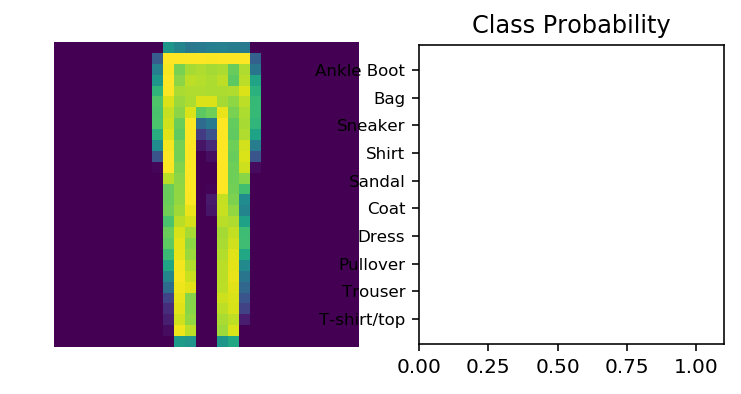

In [9]:
# calculate class probabilities (softmax) for images
ps = F.log_softmax(output, dim=1)
#ps = torch.exp(model(img))

# plot image and probabilities
helper.view_classify(img[0], ps[0], version='Fashion')